# 주관식
셀을 더블클릭해서  : 다음에 답을 입력하세요.

* 머신러닝에서 학습이라고 부르는 과정은 데이터로부터 ( )를 찾아내는 것이다. 데이터를 학습하여 모델의 ( )를 찾는 과정을 적합(fitting)이라고 한다. 괄호 안에 공통으로 들어갈 용어는: 모수(직선의 위치와 방향 결정)

* 성공적인 지도학습은 기존의 데이터에 대해 정확도가 높은 모델을 찾는 것인가?그렇지 않다면 이유는?: 모델을 훈련한 데이터와 동일한 데이터로 모델검증하면 안됨

* 데이터의 수가 극도로 적은 경우 1개의 데이터만을 검증데이터로 사용하는 교차 검증 방법은?:  단일관측지 제거

# 분류분석

* seaborn 패키지 임포트
*   판다스 임포트
*   넘파이 임포트
*  matplotlib.pyplot 임포트
* scipy 임포트(import scipy as sp)
* math 임포트(import math)
* from sklearn.datasets import make_blobs






In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math
from sklearn.datasets import make_blobs

## Naive Bayes

* 가우스안 나이브 베이즈 모델 클래스 선택

In [4]:
from sklearn.naive_bayes import GaussianNB

* 나이브 베이즈 모델 인스턴화

In [6]:
model=GaussianNB()

X_training, y_training 데이터 생성

In [13]:
import numpy as np
rng = np.random.RandomState(1)
X_training = rng.randint(5, size=(6, 100))
y_trainging = np.array([1, 2, 3, 4, 5, 6])

* 모델을 적합해라

In [14]:
model.fit(X_training,y_trainging)

GaussianNB(priors=None, var_smoothing=1e-09)

* 모델에 적용 X_training[2:3]을 predict

In [19]:
model.predict(X_training[2:3])

array([3])

## K-Nearest Neighbors

* K-Nearest Neighbors 모델 임포트

In [21]:
from sklearn.neighbors import KNeighborsClassifier

* k-nearest negihbors 모델 인스턴화

In [22]:
model=KNeighborsClassifier(n_neighbors=1)

X_training, y_training 데이터 생성

In [23]:
rng = np.random.RandomState(1)
X_training = rng.randint(5, size=(6, 100))
y_trainging = np.array([1, 2, 3, 4, 5, 6])

* 모델에 적합해라

In [24]:
model.fit(X_training,y_trainging)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

* 모델에 적용해라 prediect (X_training[2:3])



In [29]:
model.predict(X_training[2:3])

array([3])

## k-means clustering

* seaborn의 데이터셋 로드

In [51]:
import seaborn as sns
from sklearn.cluster import KMeans
sns.set_palette("Set2")

*  make_blob을 이용하여 n_samples=100, centers=4, n_features=2, random_state=6 인 x,y에 레이블 데이터를 저장해라

In [52]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=100, centers=4, n_features=2, random_state=6)

* 위 x,y를 데이터로 하고 열이름이  "x", "y"인 데이터프레임을 만들어 points변수에 저장해라

In [85]:
points = pd.DataFrame(X)
points['y']=y
points

,0,1,y
0,0.276181,-2.217047,3
1,7.927368,-9.761527,1
2,8.491428,-2.549749,0
3,-11.537102,2.434883,2
4,4.292259,-8.992204,1
...,...,...,...
95,0.874864,-2.051392,3
96,1.084631,-0.553542,3
97,7.968331,-3.231253,0
98,1.288840,-0.662518,3


### 1.k값 정하기
> 중심점을 몇 개로 할 것인지를 미리 정해줘야 한다.

* k값을 정하기 위해 산점도 그려보기
plt.scatter함수를 이용하여 points데이터프레임의 산점도를 그려라

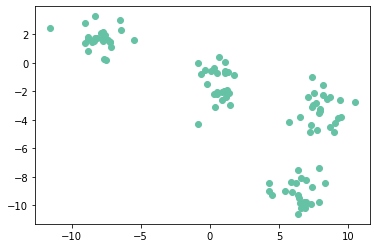

In [86]:
plt.scatter(X[:,0],X[:,1])

### 2.중심점 구하기
> k값을 정했으니 이제 중심점을 구해야 한다. 
중심점이란 말 그대로 각 cluster의 중심 좌표를 말한다. 

>2차원 데이터를 예로 들면 각 cluster의 중심점은 각 cluster의 x좌표의 평균과 y좌표의 평균이 된다. 
- 단, clustering을 시작할 때는 아직 cluster가 생성되지 않았고 따라서 cluster의 중심점을 구할 수 없기 때문에 전체 데이터 중에서 랜덤한 k개의 데이터를 중심점으로 사용한다.

* 4개의 중심점으로 하고 아직 cluster가 생성되지 않았으므로 sample메쏘드를 통해 random_state옵션을 1로 주어라. 그리고 centroid란 변수에 저장
-( *전체 데이터* 중에서 4개를 랜덤하게 골라 첫번째 중심점으로 삼았다.)

In [87]:
centroids = points.sample(4, random_state=1)
centroids

,0,1,y
80,-8.842286,1.786914,2
84,4.510561,-9.305970,1
33,5.883975,-8.372845,1
81,-8.831594,1.690414,2


* points데이터 프레임과 랜덤하게 4개의 점 그래프 분포그래프확인

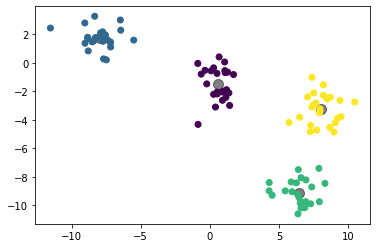

In [147]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=100,alpha=0.5);
plt.scatter(X[:,0],X[:,1],c=y_kmeans,cmap='viridis');

### 3.각 중심점으로부터의 거리를 구하여 가까운 중심점의 cluster로 할당하기
> 각 데이터에 대해서 4개의 중심점과의 거리를 계산한다. 그 후 값을 비교하여 가장 가까운 중심점의 cluster로 해당 데이터를 할당한다

* 각 데이터에 대하여, 각 중심점과의 유클리드 거리 계산

In [89]:
distance = sp.spatial.distance.cdist(points, centroids, "euclidean")

 가장 거리가 짧은 중심점의 cluster로 할당

* 열을 기준으로 distance 데이터중 최소값의 인덱스를 반환하는 함수를 이용하여 cluster_num를 생성해라
> np.argmin(distance,axis=1): 열을 기준으로 distance 데이터중 최소값의 인덱스를 반환


In [90]:
cluster_num = np.argmin(distance, axis=1)

결과 확인
* points 데이터프레임을 복제하여 result란 변수에 저장후  result 데이터 프레임에 cluster_num을 데이터로 하는 새로운 열 'cluster'을 생성해라.

In [102]:
result=pd.DataFrame(points)
cluster=result.assign(cluster=cluster_num)
kmeans.cluster_centers_.shape

(4, 2)

* 산점도 확인

In [ ]:
sns.scatterplot(x="x", y="y", hue="cluster", data=result, palette="Set2");

>잘 분류된 cluster도 있는 반면, 그렇지 않은 cluster도 있다는 걸 알 수 있다.

### 4.변경된 cluster에 대해서 중심점 구하기
> 위에서 언급했듯이, 2차원 데이터셋일 때 cluster의 중심점은 x좌표의 평균과 y좌표의 평균이다. #cluster별로 묶어서 평균 계산

* "cluster"별 평균을 구해서 centroids_2변수에 저장해라

In [143]:
centroids_2=df.groupby('cluster')
centroids_2.mean()

,0,1,y
cluster,,,
0,-8.211603,2.420481,2.000000
1,2.126943,-5.388925,2.200000
2,6.180105,-5.007395,0.982759
3,-5.489152,0.775406,2.304348


### 5.각 중심점으로부터의 거리를 구하여 가까운 중심점의 cluster로 할당하기
> 새로 구한 중심점centrioids_2에 대하여 3번에서 했던 과정을 반복

* 각 데이터에 대하여, 각 중심점과의 유클리드 거리 계산

In [151]:
from scipy.spatial import distance
dst = distance.euclidean(centers,centroids_2)

ValueError: ignored

* 가장 거리가 짧은 중심점의 cluster로 할당

* 결과 확인

* 결과를 산점도로 그려라

3번째 실행결과


> 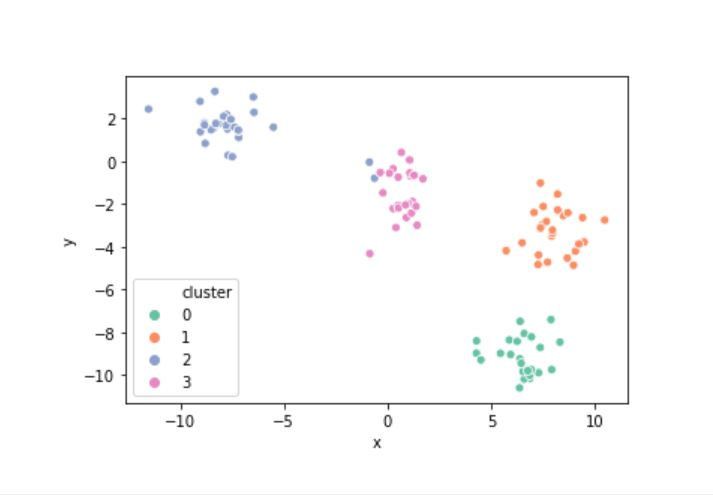



4번째 실행결과
> 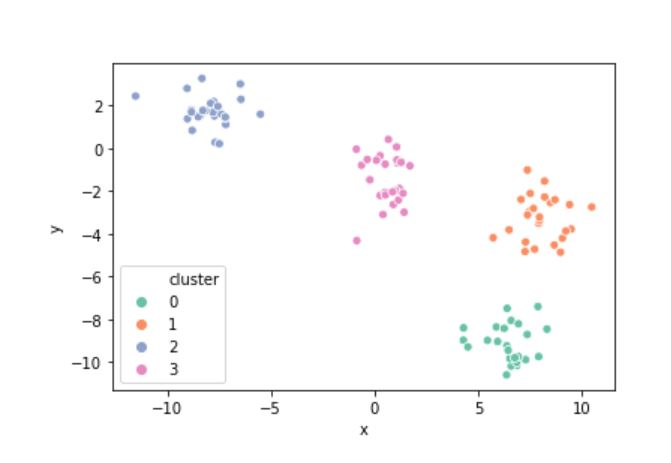

5번째 실행결과
>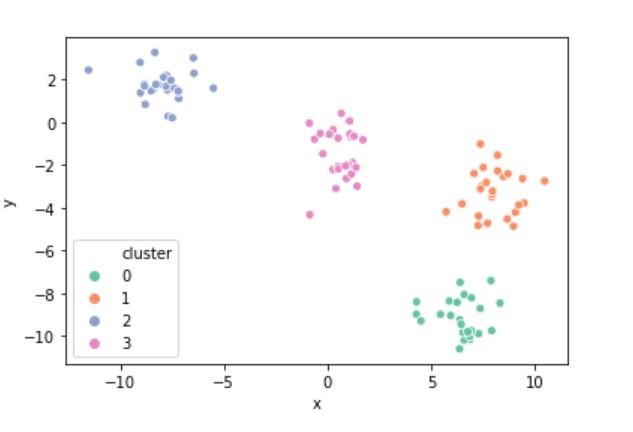